# Ćwiczenie 1b
W trakcie ćwiczeń implementowana będzie metoda przeszukiwania — Metoda gradientu prostego.
Celem ćwiczeń jest implementacja metody gradientu prostego dla dwóch funkcji oraz przebadanie wpływu rozmiaru kroku dla różnych (losowych) punktów początkowych. Należy zwizualizować proces minimalizacji na wykresie 2D.

## Punktacja:
 - obliczenie gradientów funkcji 1 pkt
 - implementacja kroku gradientu prostego 1 pkt
 - przeprowadzenie przeszukiwania minimum na obu funkcjach 1 pkt
 - wizualizacja przeszukiwania 1 pkt


In [17]:
from typing import Callable, Tuple

import matplotlib.pyplot as plt
import numpy as np

Funkcje do przeszukania:
\begin{equation}
f(\textbf{x})=x_1^2+x_2^2
\end{equation}

\begin{equation}
g(x) = 1.5-\exp \left\{-x_1^2-x_2^2\right\}-0.5 \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{equation}

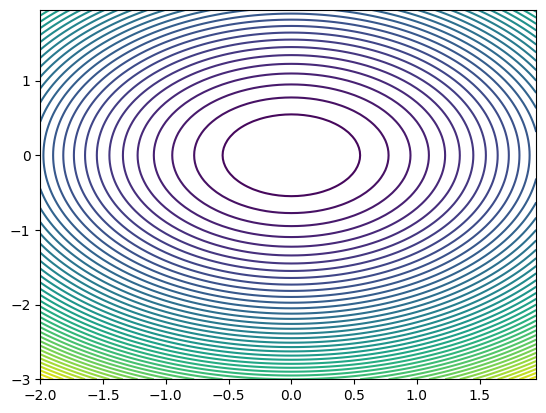

In [18]:
# Function to analyze
X = np.arange(-2, 2, 0.05)
Y = np.arange(-3, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z = X ** 2 + Y ** 2

# Contour plot en 2D
plt.figure()
plt.contour(X, Y, Z, 50)

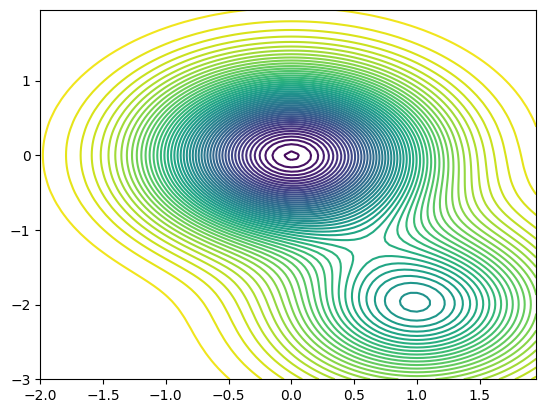

In [19]:
X = np.arange(-2, 2, 0.05)
Y = np.arange(-3, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z = 1.5 - np.exp(-(X ** 2) - Y ** 2) - 0.5 * np.exp(-((X - 1) ** 2) - (Y + 2) ** 2)
# Contour plot en 2D

plt.figure()
plt.contour(X, Y, Z, 50)

Gradienty funkcji
\begin{equation}
\nabla f(x)=
\begin{bmatrix}
2x_1 \\
2x_2
\end{bmatrix}
\end{equation}

\begin{equation}
\nabla g(x)=
\begin{bmatrix}
2 x_1 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_1-1\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\} \\
2 x_2 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_2+2\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{bmatrix}
\end{equation}

In [20]:
class SimpleGradientDescent:
    X = np.arange(-2, 2, 0.05)
    Y = np.arange(-3, 2, 0.05)
    X, Y = np.meshgrid(X, Y)

    def __init__(
            self,
            func: Callable[[float, float], float],
            grad_func: Callable[[float, float], Tuple[float, float]] = None,
            alpha: float = 0.1,
    ):
        self.alpha = alpha
        self.func = func
        if grad_func is None:

            def simple_grad(x1: float, x2: float) -> Tuple[float, float]:
                h = 0.01
                base = func(x1, x2)
                return (
                    (func(x1 + h, x2) - base) / h,
                    (func(x1, x2 + h) - base) / h,
                )

            self.grad_func = simple_grad
        else:
            self.grad_func = grad_func
        self.trace = None  # trace of search

    def _calc_z_value(self):
        self.Z = self.func(self.X, self.Y)

    def plot_func(self):
        self._calc_z_value()
        plt.figure()
        plt.contour(self.X, self.Y, self.Z, 50)
        if len(self.trace) > 0:
            plt.scatter(self.trace[:, 0], self.trace[:, 1], s=10)

    def calculate_func_value(self, x1: float, x2: float) -> float:
        return self.func(x1, x2)

    def calculate_func_grad(self, x1: float, x2: float) -> Tuple[float, float]:
        return self.grad_func(x1, x2)

    def gradient_descent_step(self, x1: float, x2: float) -> Tuple[float, float]:
        grad = np.array(self.calculate_func_grad(x1, x2))
        return grad * self.alpha

    def minimize(
            self,
            x1_init: float,
            x2_init: float,
            steps: int,
            plot: bool = False,
    ):
        x1 = x1_init
        x2 = x2_init
        self.trace = np.array([[x1, x2]])
        for _ in range(steps):
            dx1, dx2 = self.gradient_descent_step(x1, x2)
            x1 -= dx1
            x2 -= dx2
            self.trace = np.append(self.trace, [[x1, x2]], axis=0)
        if plot:
            self.plot_func()

# Funkcja 1

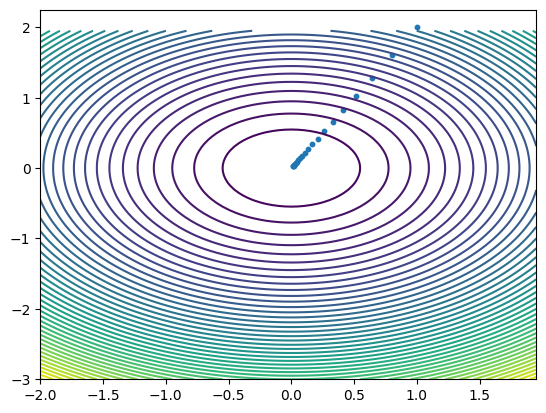

In [21]:
def f1(x1, x2):
    return x1 ** 2 + x2 ** 2


def gradient_f1(x1, x2):
    return 2 * x1, 2 * x2


sgd1 = SimpleGradientDescent(f1, gradient_f1)
sgd1.minimize(1, 2, steps=20, plot=True)

# Funkcja 2

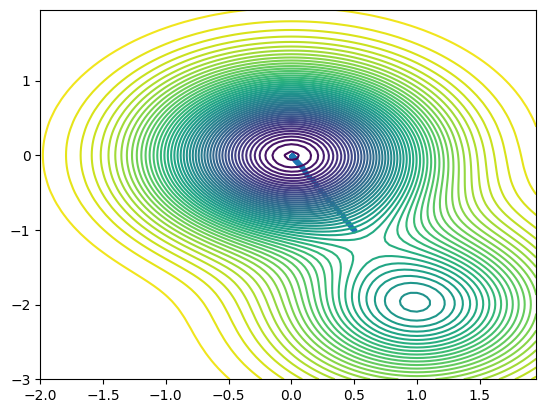

In [22]:
def f2(x1, x2):
    return (
            1.5
            - np.exp(-(x1 ** 2) - x2 ** 2)
            - 0.5 * np.exp(-((x1 - 1) ** 2) - (x2 + 2) ** 2)
    )


def gradient_f2(x1, x2):
    a = np.exp(-(x1 ** 2) - x2 ** 2)
    b = np.exp(-((x1 - 1) ** 2) - (x2 + 2) ** 2)
    return 2 * x1 * a + (x1 - 1) * b, 2 * x2 * a + (x2 + 2) * b


sgd2 = SimpleGradientDescent(f2, gradient_f2)
sgd2.minimize(0.5, -1, steps=100, plot=True)

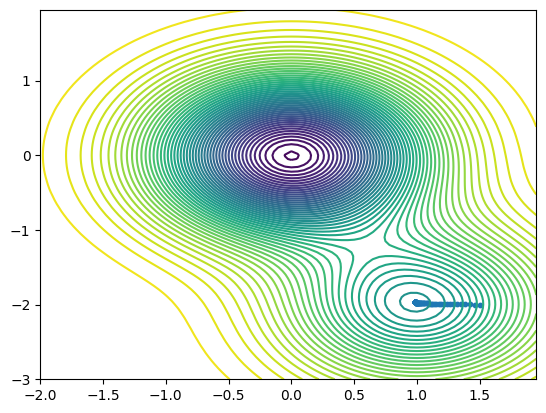

In [23]:
sgd2.minimize(1.5, -2, steps=100, plot=True)

0.6129971231360172 -1.2259942462720343


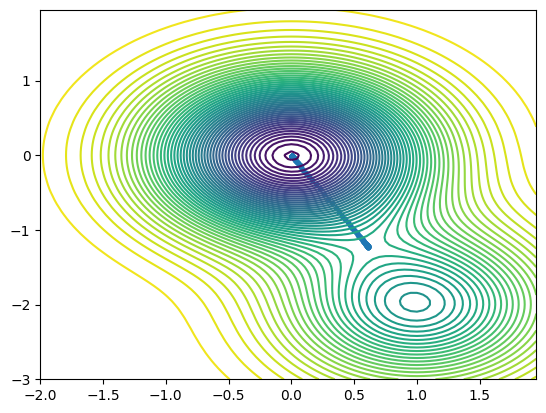

In [24]:
r = 0.5
a = 0.2
for _ in range(10000):
    h = 0.01
    # pochodna kierunkowa
    g1 = (f2(1 * (r + h), -2 * r) - f2(1 * r, -2 * r)) / h
    g2 = (f2(1 * r, -2 * (r + h)) - f2(1 * r, -2 * r)) / h
    grad = np.dot(np.array([g1, g2]), np.array([1, -2]) / np.linalg.norm([1, -2]))
    r -= grad * a
sgd2.minimize(1 * r, -2 * r, steps=100, plot=True)
print(r, -2 * r)

Użycie metody ilorazu różnicowego, gdy nie podamy funkcji gradientu

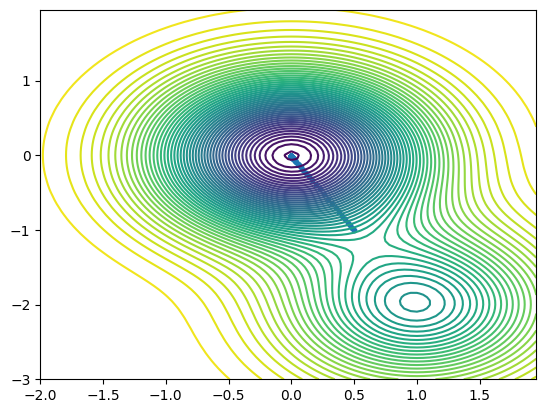

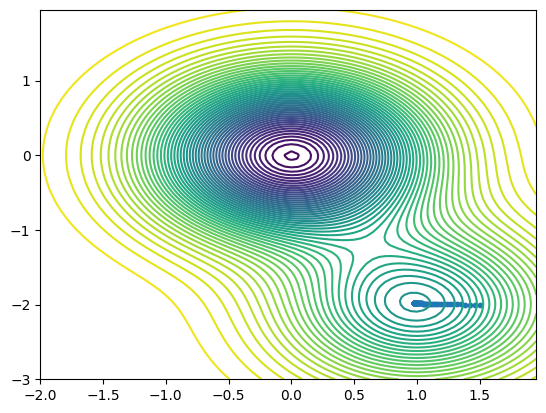

In [25]:
# use simple numerical gradient when no gradient function is provided
sgd2num = SimpleGradientDescent(f2)
sgd2num.minimize(0.5, -1, steps=100, plot=True)
sgd2num.minimize(1.5, -2, steps=100, plot=True)

Zbyt duża alpha

Rozbieżność

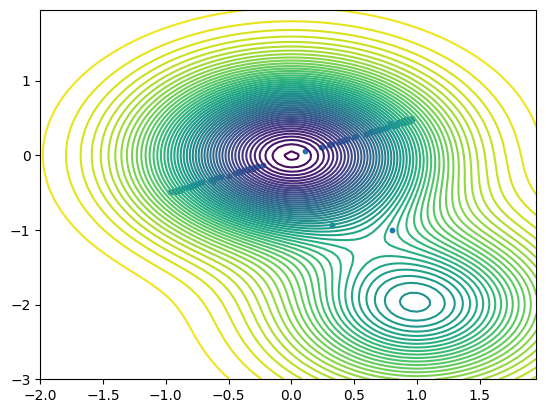

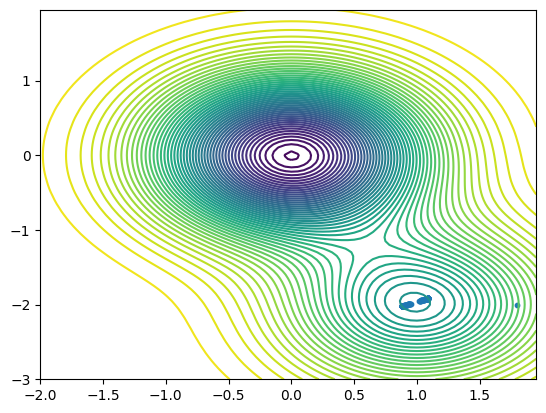

In [26]:
sgd2bigalpha = SimpleGradientDescent(f2, gradient_f2, 2)
sgd2bigalpha.minimize(0.8, -1, steps=100, plot=True)
sgd2bigalpha.minimize(1.8, -2, steps=100, plot=True)

Oscylacje

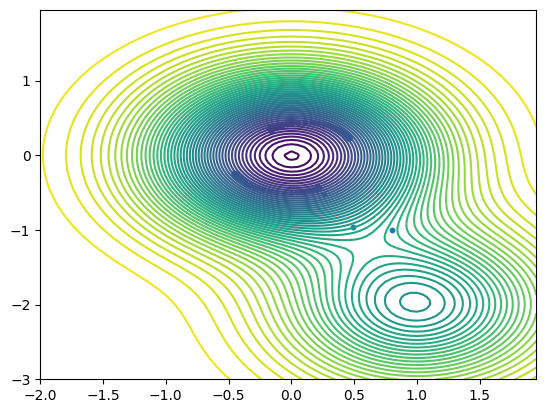

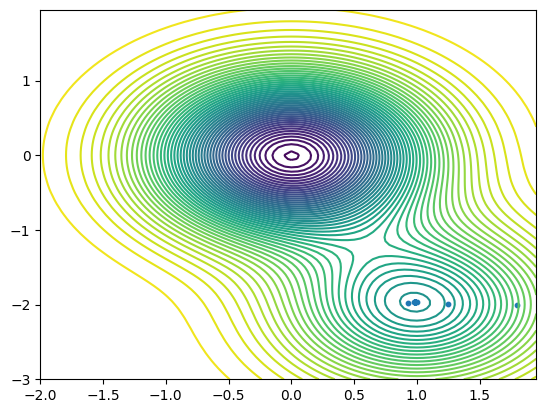

In [27]:
sgd3 = SimpleGradientDescent(f2, gradient_f2, 1.3)
sgd3.minimize(0.8, -1, steps=100, plot=True)
sgd3.minimize(1.8, -2, steps=100, plot=True)

Losowe punkty startowe
- gdy jest zbyt "płasko" proces zbiega wolno, potrzeba wtedy więcej iteracji
- proces dąży do bliższego minimum

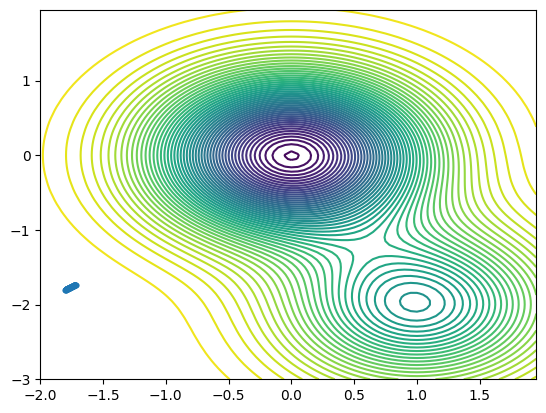

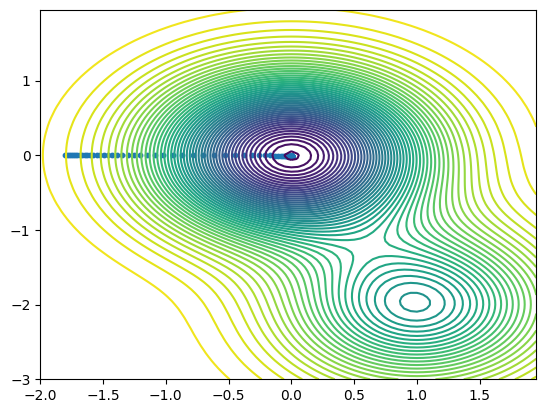

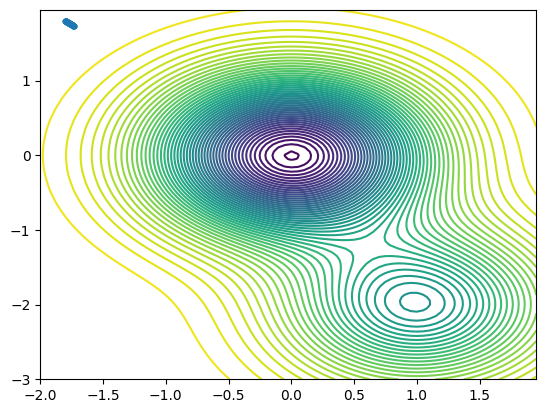

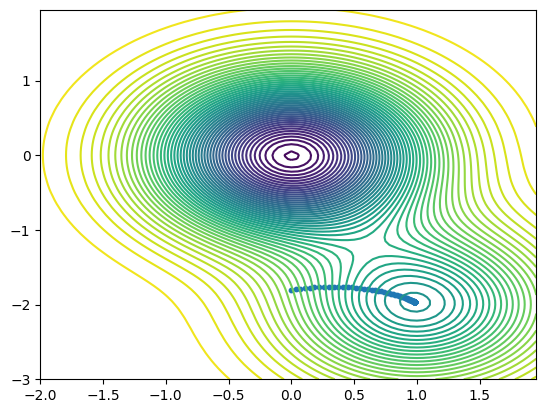

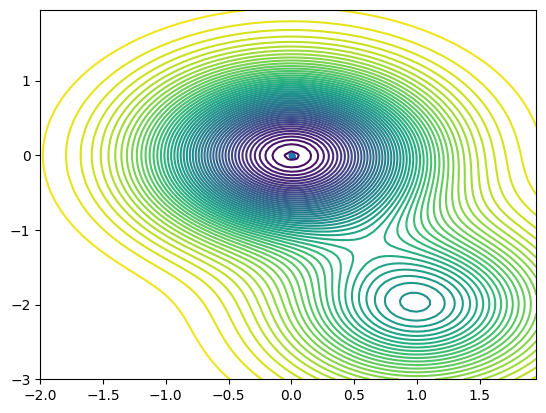

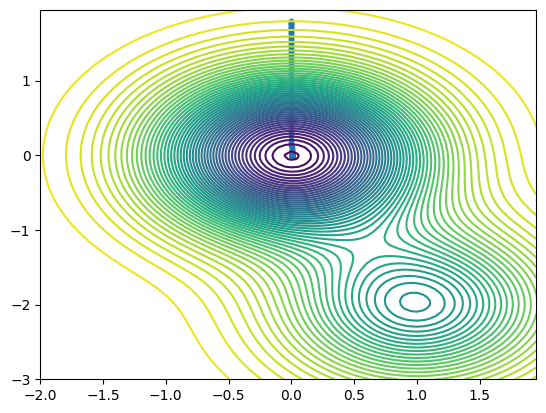

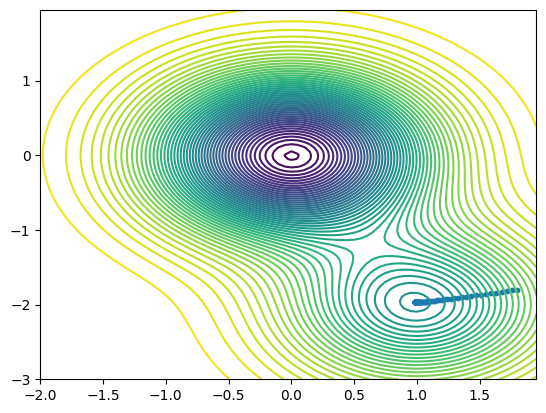

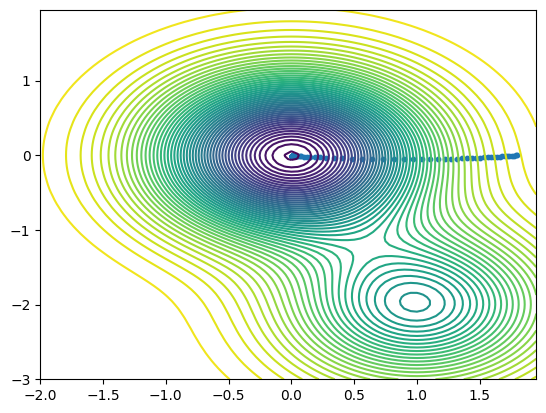

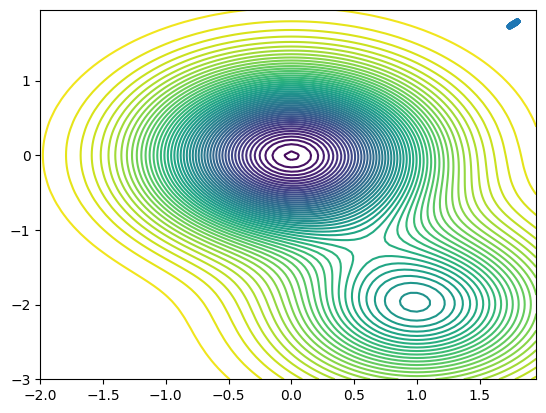

In [28]:
xs = np.linspace(-1.8, 1.8, 3)
ys = np.linspace(-1.8, 1.8, 3)

sgd4 = SimpleGradientDescent(f2, gradient_f2)
for (x, y) in ((x, y) for x in xs for y in ys):
    sgd4.minimize(x, y, steps=100, plot=True)